<a href="https://colab.research.google.com/github/trong-khanh-1109/CS114.L22.KHCL/blob/main/Take_features_by_HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dùng HOG trích xuất đặc trưng

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image, ImageChops
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.feature import hog
import os
import pandas as pd

# Test trích xuất đặc trưng 1 hình

256
(256,)


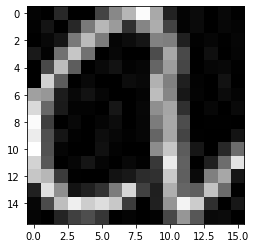

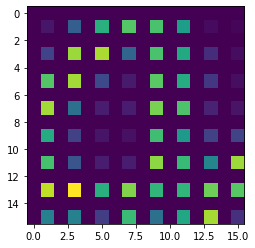

In [ ]:
an_img = Image.open('/content/drive/My Drive/My Data/Do_An_Images/a/picture_2.jpg')
plt.imshow(an_img, cmap = 'gray')
#link_an_img = np.array(link_an_img)
img,im = hog(an_img, pixels_per_cell=(2,2), cells_per_block=(2,2), visualize=True)
plt.figure()
plt.imshow(im)
print(im.size)
print(np.asarray(im).flatten().shape)

# **Thực hiện trích xuất đặc trưng HOG cho các ảnh**

In [ ]:
FJoin = os.path.join

In [ ]:
def getLink(path):
    ans = []
    label = []
    index = 0
    list_folder = [FJoin(path, f) for f in sorted(os.listdir(path))]
    for f in list_folder:
        list_img = [FJoin(f, img_id) for img_id in sorted(os.listdir(f))]
        for img_link in list_img:
            ans.append(img_link)
            label.append(index)
        index += 1
    return ans, label

In [ ]:
#train_path = '/content/drive/MyDrive/Data_Final_Project/Train'
#vali_path = '/content/drive/MyDrive/Data_Final_Project/Validation'
test_path = '/content/drive/MyDrive/Data_Final_Project/Test'
#link_train, label_train = getLink(train_path)
#link_vali, label_vali = getLink(vali_path)
link_test, label_test = getLink(test_path)
#print(len(link_train))
#print(len(link_vali))
print(len(link_test))

5384


In [ ]:
print(link_test)
print(len(label_test))

['/content/drive/MyDrive/Data_Final_Project/Test/a/0.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/10.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/108.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/109.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/11.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/12.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/13.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/14.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/15.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/16.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/17.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/18.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/19.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/20.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/21.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/22.jpg', '/content/drive/MyDrive/Data_Final_Project/Test/a/23.j

In [ ]:
# Hàm trích xuất đặc trưng
def getFeature_Label(link, label):
    list_feature = []
    for img_link in link:
        img = Image.open(img_link).convert('LA')
        img = hog(img, pixels_per_cell=(2,2), cells_per_block=(2,2), visualize=False) # hàm lấy feature với các ô block để chuẩn hóa có kích thước 2x2 và mỗi ô trong block có kích thước 2x2 pixel
        list_feature.append(np.asarray(img).ravel())
        #print(np.asarray(img).ravel().shape)
    return np.array(list_feature), np.array(label)

#**Lấy feature các file train, validation, test và lưu vào file.csv**


> Tập train



In [ ]:
X_train, Y_train = getFeature_Label(link_train, label_train)

In [ ]:
len(X_train[0])

1764

In [ ]:
pd.DataFrame(X_train).to_csv('/content/drive/MyDrive/Data_Final_Project/Save_Data_HOG/X_train_HOG.csv', header= None, index=None)
pd.DataFrame(Y_train).to_csv('/content/drive/MyDrive/Data_Final_Project/Save_Data_HOG/Y_train_HOG.csv', header= None, index=None)

> Tập validation

In [ ]:
X_val, Y_val = getFeature_Label(link_vali, label_vali)

In [ ]:
print(len(X_val))

4863


In [ ]:
pd.DataFrame(X_val).to_csv('/content/drive/MyDrive/Data_Final_Project/Save_Data_HOG/X_val_HOG.csv', header= None, index=None)
#pd.DataFrame(Y_val).to_csv('/content/drive/MyDrive/Data_Final_Project/Save_Data_HOG/Y_val_HOG.csv', header= None, index=None)

> Tập test

In [ ]:
X_test, Y_test = getFeature_Label(link_test, label_test)

In [ ]:
print(X_test[0])

[0.08273543 0.36229584 0.         ... 0.         0.         0.        ]


In [ ]:
pd.DataFrame(X_test).to_csv('/content/drive/MyDrive/Data_Final_Project/Save_Data_HOG/X_test_HOG.csv', header= None, index=None)
pd.DataFrame(Y_test).to_csv('/content/drive/MyDrive/Data_Final_Project/Save_Data_HOG/Y_test_HOG.csv', header= None, index=None)